[View in Colaboratory](https://colab.research.google.com/github/karanj1/Machine-Learning/blob/master/ANIMAL_ACTIVITY_RECOGNITION_ON_COLLAR_TAGS.ipynb)

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
csv_import = drive.CreateFile({'id':'1Je8u5VgE0CT6cCeaa7fTsPN4KsC_X3Sk'})   # import data from google drive 

csv_import.GetContentFile('S11.csv') #- 'train.csv' is the file name that will be accessible in the notebook.

S1_data = pd.read_csv(open('S11.csv'))


csv_import = drive.CreateFile({'id':'1jSIR5EQo37BHVte8ubkbGQjMKg6PWOH7'})   # import data from google drive 

csv_import.GetContentFile('S22.csv') #- 'train.csv' is the file name that will be accessible in the notebook.

S2_data = pd.read_csv(open('S22.csv'))

In [4]:
# List files available
#print(os.listdir("../input/"))
ls

adc.json  datalab@  S11.csv  S22.csv  sample_data/


### Data Visualization

In [39]:
# Head view of data of sheep1
S1_data.head(10)
#print(S1_data.loc[[159220, 100000, 10000]])


,label,animal_ID,segment_ID,timestamp_ms,ax,ay,az,axhg,ayhg,azhg,cx,cy,cz,gx,gy,gz,pressure,temp
0,walking,S1,1,31,-2.894590,-7.53455,-6.09324,3.15345,-6.156740,18.77050,1.5240,-0.4950,0.5700,-0.060976,-25.42680,-40.73170,NaN,27.36
1,walking,S1,1,66,-2.731780,-6.79235,-7.66384,2.70296,-2.102300,16.51810,NaN,NaN,NaN,-7.195120,-22.25610,-41.95120,NaN,27.37
2,walking,S1,1,101,-1.290470,-7.48188,-7.74285,4.80526,-5.165650,16.63820,1.5525,-0.4845,0.5475,-36.280500,-21.76830,-39.14630,NaN,27.33
3,walking,S1,1,136,-0.612916,-7.31907,-7.80989,5.64618,-3.183480,14.95640,NaN,NaN,NaN,-11.829300,-36.52440,-31.52440,1008.21,27.36
4,walking,S1,1,171,0.428562,-3.03824,-6.12916,6.00657,2.282500,20.18210,1.5390,-0.4980,0.5610,31.707300,-35.73170,-33.35370,NaN,27.37
5,walking,S1,1,206,1.103730,-1.93212,-8.01100,7.38808,3.123420,14.92630,NaN,NaN,NaN,-5.304880,-68.41460,-56.09760,NaN,27.36
6,walking,S1,1,241,2.913740,-3.50511,-13.92950,8.43924,-1.351480,8.79963,1.5840,-0.5100,0.5670,-100.488000,-76.34150,-74.51220,NaN,27.37
7,walking,S1,1,276,2.681510,-10.14900,-10.49380,8.34914,-7.207890,16.24780,NaN,NaN,NaN,-84.756100,-5.42683,-80.24390,NaN,27.36
8,walking,S1,1,311,2.130840,-8.23845,-8.25281,6.54716,-4.324730,18.71050,1.5615,-0.5145,0.5775,58.841500,21.70730,-33.23170,NaN,27.38
9,walking,S1,1,346,1.036690,-2.79403,-6.43801,4.56500,-0.120131,17.17880,NaN,NaN,NaN,89.024400,25.60980,-3.04878,NaN,27.36


In [40]:
# statistical information such as mean, median, mode, standard deviation, etc from a certain column. In pandas, we can call ‘describe()’ method to fetch all those information altogether.
S1_data.describe()

,segment_ID,timestamp_ms,ax,ay,az,axhg,ayhg,azhg,cx,cy,cz,gx,gy,gz,pressure,temp
count,341142.000000,3.411420e+05,341142.000000,341142.000000,341142.000000,341142.000000,341142.000000,341142.000000,170587.000000,170587.000000,170587.000000,341142.000000,341142.000000,341142.000000,42621.000000,341142.000000
mean,332.032239,5.969998e+06,1.279181,-0.179715,-9.348867,6.034579,3.665635,14.642413,1.506844,-0.560476,0.546006,-0.263122,0.185998,-0.370808,1008.915981,29.711428
std,119.110038,3.446777e+06,2.253546,5.020277,4.577231,2.609480,5.292260,5.018576,0.121817,0.160701,0.073792,92.128174,45.368735,36.505735,0.321682,2.075278
min,1.000000,3.100000e+01,-78.036600,-71.342400,-78.453200,-79.016500,-75.863000,-102.232000,1.215000,-0.906000,-0.079500,-945.122000,-1357.010000,-944.512000,1008.070000,26.090000
25%,254.000000,2.985015e+06,0.490811,-2.908960,-9.943120,4.805260,0.810887,13.094300,1.390500,-0.684000,0.519000,-13.841500,-9.390240,-10.000000,1008.800000,28.170000
50%,358.000000,5.969998e+06,1.517920,1.132460,-9.406820,6.126700,4.685130,14.836200,1.512000,-0.571500,0.556500,-0.670732,-0.060976,0.060976,1008.980000,30.070000
75%,383.000000,8.954982e+06,2.248160,2.856280,-8.449140,7.388080,6.877530,16.337900,1.614000,-0.447000,0.595500,12.195100,8.902440,9.634150,1009.080000,31.130000
max,679.000000,1.193997e+07,78.450800,76.964000,60.489500,95.925000,76.583800,69.916500,1.896000,-0.148500,0.691500,1366.650000,1497.680000,1086.770000,1009.600000,34.600000


In [41]:
# get the types of activities from the dataset # sokme random examples to view data in different manner
print(sorted(S1_data.label.unique())) # S1,  sorted
print(S2_data.label.unique())  # S2  , not sorted
print()
print(list(S1_data.groupby('label')['label'].count()))
print()
print(S2_data.groupby('label')['label'].count())

['fighting', 'grazing', 'running', 'shaking', 'standing', 'trotting', 'walking']
['walking' 'trotting' 'shaking' 'standing' 'grazing' 'running' 'fighting']

[331, 176862, 16945, 198, 92859, 18005, 35942]

label
fighting         5
grazing     119329
running      13546
shaking        176
standing    166505
trotting     15773
walking      52896
Name: label, dtype: int64


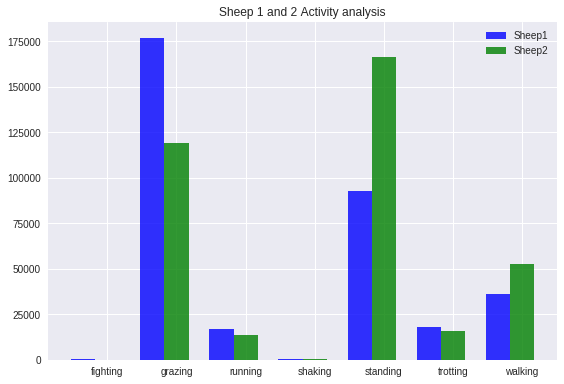

In [45]:
# data to plot
objects = sorted(S1_data.label.unique())
y_pos = np.arange(len(objects))
counts_S1 = (list(S1_data.groupby('label')['label'].count()))
counts_S2 = (list(S2_data.groupby('label')['label'].count()))
 
# create plot
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, counts_S1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Sheep1')
 
rects2 = plt.bar(y_pos + bar_width, counts_S2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Sheep2')
 
plt.title('Sheep 1 and 2 Activity analysis')
plt.xticks(y_pos + bar_width, objects)
plt.legend()
 
plt.tight_layout()
plt.show()

### Breaking down into measured data and target

In [147]:
target_S1 = S1_data['label'].copy(deep=True)  #y
# convert series to dataframe #when we have copied only one column, it creates series instead of dataframe so we have to convert that series to dataframe again
target_S1 = pd.DataFrame({'label':target_S1.values})#https://stackoverflow.com/questions/26097916/python-best-way-to-convert-a-pandas-series-into-a-pandas-dataframe

train_S1 = S1_data.ix[:,4:].copy(deep=True)
S1_data.ix[:,0].head() #first column # y
#S1_data.ix[:,4:].head() # columns from 4 to last # X

0    walking
1    walking
2    walking
3    walking
4    walking
Name: label, dtype: object

### Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables.  A machine learning model unfortunately cannot deal with categorical variables (except for some models such as [LightGBM](http://lightgbm.readthedocs.io/en/latest/Features.html)). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

In [0]:
# Create a label encoder object
le = LabelEncoder()
# Train on the training data
#le.fit(target_S1)
# Transform data
lab_enc = le.fit_transform(target_S1[:])
target_S1['label_encod'] = pd.Series(lab_enc, index=target_S1.index)

In [151]:
print(target_S1.head())
print(target_S1.loc[[159220, 100000, 10000]])

     label  label_encod
0  walking            6
1  walking            6
2  walking            6
3  walking            6
4  walking            6
           label  label_encod
159220   grazing            1
100000  standing            4
10000    walking            6


### Data Engineering

Fix the 'NaN' values in columns: cx	cy	cz and pressure

In [153]:
# Visualize incoming measurements from sensors
train_S1.head(10)

,ax,ay,az,axhg,ayhg,azhg,cx,cy,cz,gx,gy,gz,pressure,temp
0,-2.894590,-7.53455,-6.09324,3.15345,-6.156740,18.77050,1.5240,-0.4950,0.5700,-0.060976,-25.42680,-40.73170,NaN,27.36
1,-2.731780,-6.79235,-7.66384,2.70296,-2.102300,16.51810,NaN,NaN,NaN,-7.195120,-22.25610,-41.95120,NaN,27.37
2,-1.290470,-7.48188,-7.74285,4.80526,-5.165650,16.63820,1.5525,-0.4845,0.5475,-36.280500,-21.76830,-39.14630,NaN,27.33
3,-0.612916,-7.31907,-7.80989,5.64618,-3.183480,14.95640,NaN,NaN,NaN,-11.829300,-36.52440,-31.52440,1008.21,27.36
4,0.428562,-3.03824,-6.12916,6.00657,2.282500,20.18210,1.5390,-0.4980,0.5610,31.707300,-35.73170,-33.35370,NaN,27.37
5,1.103730,-1.93212,-8.01100,7.38808,3.123420,14.92630,NaN,NaN,NaN,-5.304880,-68.41460,-56.09760,NaN,27.36
6,2.913740,-3.50511,-13.92950,8.43924,-1.351480,8.79963,1.5840,-0.5100,0.5670,-100.488000,-76.34150,-74.51220,NaN,27.37
7,2.681510,-10.14900,-10.49380,8.34914,-7.207890,16.24780,NaN,NaN,NaN,-84.756100,-5.42683,-80.24390,NaN,27.36
8,2.130840,-8.23845,-8.25281,6.54716,-4.324730,18.71050,1.5615,-0.5145,0.5775,58.841500,21.70730,-33.23170,NaN,27.38
9,1.036690,-2.79403,-6.43801,4.56500,-0.120131,17.17880,NaN,NaN,NaN,89.024400,25.60980,-3.04878,NaN,27.36


In [0]:
# replace NaN values with Mean of previous and next non-empty values
#https://stackoverflow.com/questions/46628892/pandas-how-can-i-fill-in-the-n-a-with-the-mean-of-previous-none-empty-value-and
train_S1a = pd.concat([train_S1.ffill(), train_S1.bfill()]).groupby(level=0).mean()

In [161]:
train_S1a.head()
#train_S1a.isnull().values.any() #check if daraframe contains any NaN values

,ax,ay,az,axhg,ayhg,azhg,cx,cy,cz,gx,gy,gz,pressure,temp
0,-2.894590,-7.53455,-6.09324,3.15345,-6.15674,18.7705,1.52400,-0.49500,0.57000,-0.060976,-25.4268,-40.7317,1008.210,27.36
1,-2.731780,-6.79235,-7.66384,2.70296,-2.10230,16.5181,1.53825,-0.48975,0.55875,-7.195120,-22.2561,-41.9512,1008.210,27.37
2,-1.290470,-7.48188,-7.74285,4.80526,-5.16565,16.6382,1.55250,-0.48450,0.54750,-36.280500,-21.7683,-39.1463,1008.210,27.33
3,-0.612916,-7.31907,-7.80989,5.64618,-3.18348,14.9564,1.54575,-0.49125,0.55425,-11.829300,-36.5244,-31.5244,1008.210,27.36
4,0.428562,-3.03824,-6.12916,6.00657,2.28250,20.1821,1.53900,-0.49800,0.56100,31.707300,-35.7317,-33.3537,1008.225,27.37


### Feature Selection
We've come up with 14 features so far: [ax	ay	az	axhg	ayhg	azhg	cx	cy	cz	gx	gy	gz	pressure	temp]

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

It decreases redundancy among the data</br>
It speeds up the training process</br>
It reduces overfitting</br></br>
Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train_S1a, target_S1.ix[:,0])

In [0]:
features = pd.DataFrame()
features['feature'] = train_S1a.columns
features['importance'] = clf.feature_importances_

In [160]:
features.sort_values(['importance'],ascending=False)    #http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

,feature,importance
7,cy,0.138391
12,pressure,0.121456
13,temp,0.116907
1,ay,0.107074
9,gx,0.077715
6,cx,0.067152
2,az,0.066778
4,ayhg,0.065176
8,cz,0.056953
10,gy,0.044862


In [0]:
# split data into train validation and test
S1_train, S1_test, S1_train, S1_test 
    = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.2, random_state=1)